In [1]:
%config IPCompleter.use_jedi = False
from wholeslidedata.iterators import create_batch_iterator
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import init_plot, plot_batch, show_plot
from wholeslidedata.samplers.utils import plot_batch_detection
import time
from pprint import pprint

# BatchIterator 

In [2]:
# basic user config 
user_config = './user_config_detection.yml'

# mode of batch iterator
mode = 'training'

# number of cpus used to extract patches on multiple cores
cpus = 1

### Dataset

In [3]:
with create_batch_iterator(user_config=user_config, 
                            mode=mode, 
                            cpus=cpus) as training_batch_iterator:
    pprint(training_batch_iterator.dataset.annotations_per_label_per_key)

{'100B': {'lymphocytes and plasma cells': 255, 'roi': 3}}


In [29]:
# create batch iterator via context manager
with create_batch_iterator(user_config=user_config, 
                            mode=mode, 
                            cpus=cpus) as training_batch_iterator:
    x_batch, y_batch, info = next(training_batch_iterator)
    print(x_batch.shape)
    print(y_batch.shape)
    print(y_batch[0])
    
    print('\n\nINFO\n')
    print(info)

    print('\n\nReference')
    print(info['sample_references'][0])
    center_point = info['sample_references'][0]['point']
    wsi = training_batch_iterator.dataset.get_image_from_reference(info['sample_references'][0]['reference'])
    wsa = training_batch_iterator.dataset.get_wsa_from_reference(info['sample_references'][0]['reference'])
    annotation = training_batch_iterator.dataset.get_annotation_from_reference(info['sample_references'][0]['reference'])
    print(wsi, wsi.path)
    print(wsa, wsa.path)
    print(annotation, annotation.label.name)
    print(center_point)

(10, 256, 256, 3)
(10, 1000, 6)
[[ 55 250  73 268   1   1]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 ...
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


INFO

{'mode': 'training', 'sample_references': [{'reference': WholeSlideSampleReference(file_index=0, file_key='100B', wsa_index=0, annotation_index=244), 'point': <shapely.geometry.point.Point object at 0x7fee6f8ce070>}, {'reference': WholeSlideSampleReference(file_index=0, file_key='100B', wsa_index=0, annotation_index=16), 'point': <shapely.geometry.point.Point object at 0x7feeab116130>}, {'reference': WholeSlideSampleReference(file_index=0, file_key='100B', wsa_index=0, annotation_index=133), 'point': <shapely.geometry.point.Point object at 0x7feeab116160>}, {'reference': WholeSlideSampleReference(file_index=0, file_key='100B', wsa_index=0, annotation_index=133), 'point': <shapely.geometry.point.Point object at 0x7feeab1168b0>}, {'reference': WholeSlideSampleReference(file_index=0, 

### Finite (with reset)

When adding 'number_of_batches' as argument to the create_batch_iterator, the iterator will reset itelf after the specified number of batches.
As can be seen, the patches/masks under "Batches (repeat=0)" and "Batches (repeat=1)" are identical at every location in the batches.

repeat 0


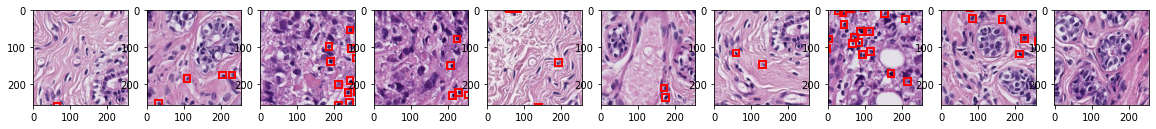

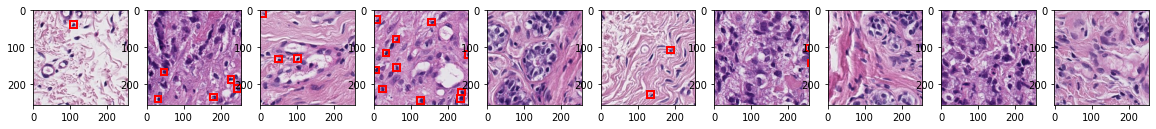

repeat 1


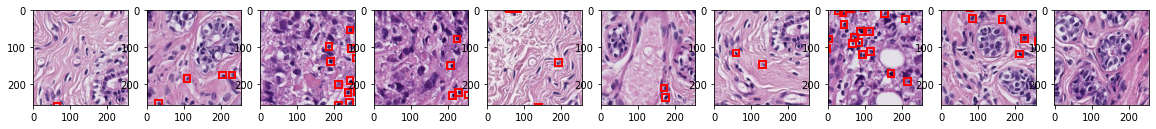

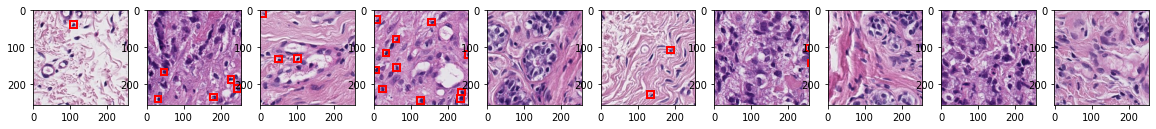

In [5]:
# create batch iterator via context manager
number_of_batches = 2
repeats=2
with create_batch_iterator(user_config=user_config, 
                           number_of_batches=number_of_batches,
                            mode=mode, 
                            cpus=cpus) as training_batch_iterator:
    
    for r in range(repeats):
        print(f'repeat {r}')
        for idx, (x_batch, y_batch, info) in enumerate(training_batch_iterator):
            plot_batch_detection(x_batch, y_batch)
        